## Poisson distribution

__Lets generate Poisson sample of different ${\bf{n}}$ with ${\bf{\lambda = 5}}$:__


In [1]:
from scipy.stats import laplace,poisson
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import seaborn as sns
sns.set()
import pandas as pd 
import scipy.stats as sts

In [2]:
p_lambda = 5
sample_5,sample_10,sample_100,sample_1000,sample_100000 = [],[],[],[],[]

for i in range(5):
    sample_5.append(poisson.rvs(p_lambda, size=5))
    sample_10.append(poisson.rvs(p_lambda, size=10))
    sample_100.append(poisson.rvs(p_lambda, size=100))
    sample_1000.append(poisson.rvs(p_lambda, size=1000))
    sample_100000.append(poisson.rvs(p_lambda, size=100000))

In [3]:
for i in range(len(sample_5)):
    print(sample_5[i]) 

[8 3 4 4 4]
[6 6 5 7 2]
[3 6 3 8 7]
[4 6 3 5 8]
[ 5 10  8  4  6]


In [4]:
for i in range(len(sample_10)):
    print(sample_10[i]) 

[4 5 6 4 7 5 4 3 4 3]
[5 4 2 6 8 6 4 5 6 3]
[4 5 2 6 6 4 9 7 3 9]
[2 8 1 8 6 4 6 7 2 6]
[4 9 8 4 7 2 6 3 3 4]


__Empirical function and distributin function for different__ ${\bf{n}}$

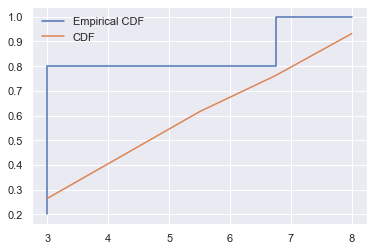

In [5]:
from statsmodels.distributions.empirical_distribution import ECDF
#Empirical CDF for n = 5
ecdf_5 = ECDF(sample_5[0])
x = np.linspace(min(sample_5[0]), max(sample_5[0]), num=len(sample_5[0]))
y_ecdf = ecdf_5(x)
plt.gca().step(x, y_ecdf, label='Empirical CDF')
#CDF for n = 5
y_cdf_5 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_5, label='CDF')
plt.legend(frameon=False)

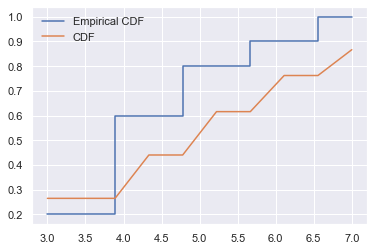

In [6]:
#Empirical CDF for n = 10
ecdf_10 = ECDF(sample_10[0])
x = np.linspace(min(sample_10[0]), max(sample_10[0]), num=len(sample_10[0]))
y = ecdf_10(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 10
y_cdf_10 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_10, label='CDF')
plt.legend(frameon=False)

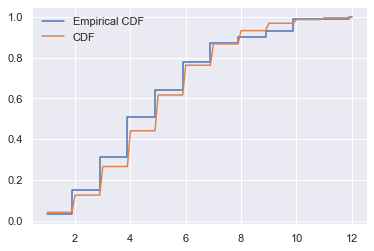

In [7]:
#Empirical CDF for n = 100
ecdf_100 = ECDF(sample_100[0])
x = np.linspace(min(sample_100[0]), max(sample_100[0]), num=len(sample_100[0]))
y = ecdf_100(x)
plt.step(x, y, label='Empirical CDF')


#CDF for n = 100
y_cdf_100 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_100, label='CDF')
plt.legend(frameon=False)

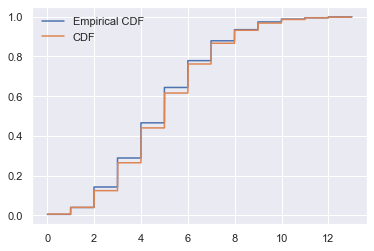

In [8]:
#Empirical CDF for n = 1000
ecdf_1000 = ECDF(sample_1000[0])
x = np.linspace(min(sample_1000[0]),
                max(sample_1000[0]),
                num=len(sample_1000[0]))
y = ecdf_1000(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 1000
y_cdf_1000 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_1000, label='CDF')
plt.legend(frameon=False)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


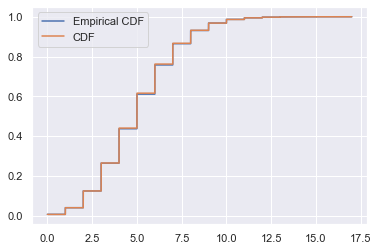

In [9]:
#Empirical CDF for n = 100000
ecdf_100000 = ECDF(sample_100000[0])
x = np.linspace(min(sample_100000[0]),
                max(sample_100000[0]),
                num=len(sample_100000[0]))
y_ecdf100000 = ecdf_100000(x)
plt.step(x, y_ecdf100000, label='Empirical CDF')

#CDF for n = 100000
y_cdf_100000 = poisson.cdf(x, 5)
plt.gca().plot(x, y_cdf_100000, label='CDF')
plt.legend()

__Finding the upper limit of the difference of each pair for different samples__

In [10]:
def lims(pop,sop):
    poisson_rv = sts.poisson(5)
    a=poisson_rv.rvs(pop)
    srt=np.sort(a)
    x2 = []
    y2 = []
    y = 0
    mon=dict()
    k=0
    for x in srt:
        if x in mon.keys():
            mon[x]+=1
        else:
            mon[x]=1
    for key,val in mon.items():
        k+=(1*val)/len(a)
        x2.append(key)
        y2.append(k)
    poisson_rv1 = sts.poisson(5)
    b=poisson_rv1.rvs(sop)
    srt1=np.sort(b)
    x3=  []
    y3= []
    y = 0
    mon1=dict()
    k=0
    for x in srt1:
        if x in mon1.keys():
            mon1[x]+=1
        else:
            mon1[x]=1
    for key,val in mon1.items():
        k+=(1*val)/len(b)
        x3.append(key)
        y3.append(k)
    b=zip(x2,y2)
    n=zip(x3,y3)
    dt=dict()
    ans=[]
    for i in b:
        dt[i[0]]=i[1]
    for i in n:
        if i[0] in dt.keys():
            ans.append(abs(dt[i[0]]-i[1]))
    return(np.round(max(ans),4))

In [11]:
ls1 = [5,10,100,1000,100000]
ls2 = [5,10,100,1000,100000]
for i in ls1:
    for j in ls2:
        res = lims(j,i)
        print('Max for samples {}-{} is {}'.format(j,i,res))

Max for samples 5-5 is 0.4
Max for samples 10-5 is 0.2
Max for samples 100-5 is 0.15
Max for samples 1000-5 is 0.265
Max for samples 100000-5 is 0.1597
Max for samples 5-10 is 0.1
Max for samples 10-10 is 0.1
Max for samples 100-10 is 0.26
Max for samples 1000-10 is 0.183
Max for samples 100000-10 is 0.1387
Max for samples 5-100 is 0.4
Max for samples 10-100 is 0.36
Max for samples 100-100 is 0.05
Max for samples 1000-100 is 0.049
Max for samples 100000-100 is 0.0744
Max for samples 5-1000 is 0.233
Max for samples 10-1000 is 0.063
Max for samples 100-1000 is 0.116
Max for samples 1000-1000 is 0.019
Max for samples 100000-1000 is 0.0122
Max for samples 5-100000 is 0.2167
Max for samples 10-100000 is 0.0842
Max for samples 100-100000 is 0.0376
Max for samples 1000-100000 is 0.0149
Max for samples 100000-100000 is 0.0057


__Creating variation series__

In [12]:
def sorted_sample(x):
    s = []
    for i in (x):
        s.append(sorted(i))
    return s


sorted_5 = sorted_sample(sample_5)
sorted_10 = sorted_sample(sample_10)
sorted_100 = sorted_sample(sample_100)
sorted_1000 = sorted_sample(sample_1000)
sorted_100000 = sorted_sample(sample_100000)

In [13]:
for i in sorted_5:
    print(i)

[3, 4, 4, 4, 8]
[2, 5, 6, 6, 7]
[3, 3, 6, 7, 8]
[3, 4, 5, 6, 8]
[4, 5, 6, 8, 10]


In [14]:
for i in sorted_10:
    print(i)

[3, 3, 4, 4, 4, 4, 5, 5, 6, 7]
[2, 3, 4, 4, 5, 5, 6, 6, 6, 8]
[2, 3, 4, 4, 5, 6, 6, 7, 9, 9]
[1, 2, 2, 4, 6, 6, 6, 7, 8, 8]
[2, 3, 3, 4, 4, 4, 6, 7, 8, 9]


__Lets count quantiles__

In [15]:
level = [0.1, 0.5, 0.7]
def statss(x):
    lsts = []
    for i in level:
        lsts.append(x[0][round(len(x[0]) * i + 1)])
    print('Квантили уровней 0.1,0,5.0,7 для n ={}'.format(len(x[0])))
    print(lsts)


statss(sorted_5)
statss(sorted_10)
statss(sorted_100)
statss(sorted_1000)
statss(sorted_100000)
# sets = pd.DataFrame([statss])

Квантили уровней 0.1,0,5.0,7 для n =5
[4, 8, 8]
Квантили уровней 0.1,0,5.0,7 для n =10
[4, 5, 6]
Квантили уровней 0.1,0,5.0,7 для n =100
[2, 5, 6]
Квантили уровней 0.1,0,5.0,7 для n =1000
[2, 5, 6]
Квантили уровней 0.1,0,5.0,7 для n =100000
[2, 5, 6]


__Theoritical quantiles__


In [16]:
level = [0.1, 0.5, 0.7]
def theo_qu(x):
    quant =[]
    for i in level:
        k = round(i*(len(x[0])-1))
        if k == len(x) - 1:
            t = x[0][k]
        else:
            t = x[0][k+1]
        if k+1<i*len(x[0]):
            quant.append(x[0][t])
        elif k+1 == i*len(x[0]):
            quant.append((x[0][k]+t)/2 )
        elif k+1> i*len(x[0]):
            quant.append(x[0][k])
    print('Квантили уровней 0.1,0,5.0,7 для n ={}'.format(len(x[0])))
    print(quant)

In [17]:
theo_qu(sorted_5)
theo_qu(sorted_10)
theo_qu(sorted_100)
theo_qu(sorted_1000)
theo_qu(sorted_100000)

Квантили уровней 0.1,0,5.0,7 для n =5
[3, 4, 4]
Квантили уровней 0.1,0,5.0,7 для n =10
[3, 4.0, 5.0]
Квантили уровней 0.1,0,5.0,7 для n =100
[2, 4, 6.0]
Квантили уровней 0.1,0,5.0,7 для n =1000
[2, 5, 6.0]
Квантили уровней 0.1,0,5.0,7 для n =100000
[2, 5, 6.0]


__Vizualization of histogram and density polygon__


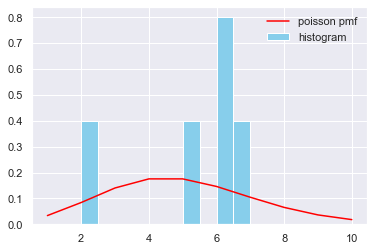

In [18]:
#n = 5
#histogram
pmf_5 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
fig, ax = plt.subplots()
plt.gca().plot(pmf_5,
               poisson.pmf(pmf_5, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_5[1],density = True, label='histogram', color="skyblue")
plt.legend(frameon=False)

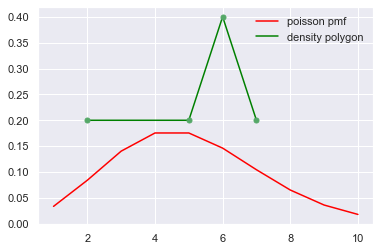

In [19]:
#n = 5
#density polygon
pol_5 = np.unique(sample_5[1], return_counts=True)
x_5 = pol_5[0]
y_5 = pol_5[1]
plt.plot(pmf_5,
         poisson.pmf(pmf_5, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_5,
               y_5 / len(sample_5[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_5, y_5 / len(sample_5[1]), 'go', ms=5)
plt.legend(frameon=False)

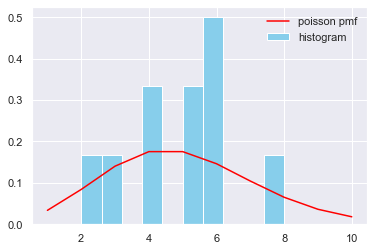

In [20]:
#n = 10
#histogram
pmf_10 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_10,
               poisson.pmf(pmf_10, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_10[1], density=1, label='histogram', color="skyblue")
plt.legend(frameon=False)

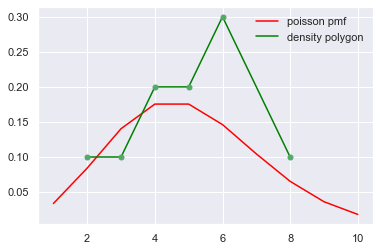

In [21]:
#n = 10
#density polygon
pol_10 = np.unique(sample_10[1], return_counts=True)
x_10 = pol_10[0]
y_10 = pol_10[1]
plt.plot(pmf_10,
         poisson.pmf(pmf_10, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_10,
               y_10 / len(sample_10[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_10, y_10 / len(sample_10[1]), 'go', ms=5)
plt.legend(frameon=False)

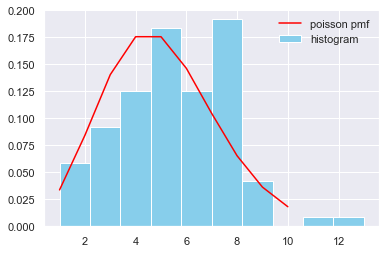

In [22]:
#n = 100
#histogram
pmf_100 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_100,
               poisson.pmf(pmf_100, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_100[1], density=True, label='histogram', color="skyblue")
plt.legend(frameon=False)

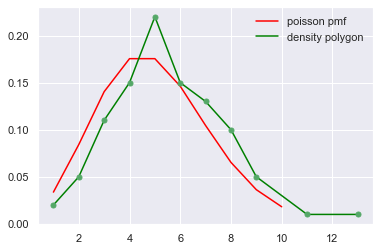

In [23]:
#n = 100
#density polygon
pol_100 = np.unique(sample_100[1], return_counts=True)
x_100 = pol_100[0]
y_100 = pol_100[1]
plt.plot(pmf_100,
         poisson.pmf(pmf_100, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_100,
               y_100 / len(sample_100[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_100, y_100 / len(sample_100[1]), 'go', ms=5)
plt.legend(frameon=False)

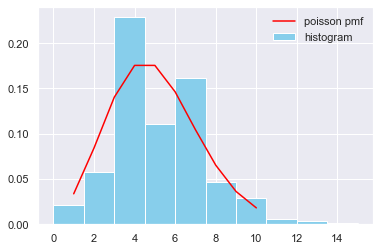

In [24]:
#n = 1000
pmf_1000 = np.arange(poisson.ppf(0.01, p_lambda), poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_1000,
               poisson.pmf(pmf_1000, p_lambda),
               ms=5,
               label='poisson pmf',
               color='red')
plt.gca().hist(sample_1000[1],
               density=True,
               label='histogram',
               color="skyblue")

plt.legend(frameon=False)

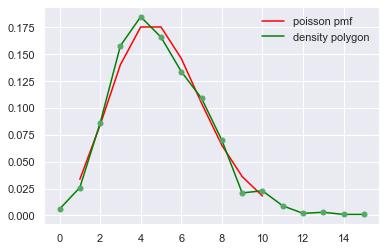

In [25]:
#n = 1000
#density polygon
pol_1000 = np.unique(sample_1000[1], return_counts=True)
x_1000 = pol_1000[0]
y_1000 = pol_1000[1]
plt.plot(pmf_1000,
         poisson.pmf(pmf_1000, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_1000,
               y_1000 / len(sample_1000[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_1000, y_1000 / len(sample_1000[1]), 'go', ms=5)
plt.legend(frameon=False)

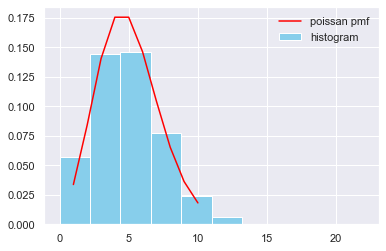

In [26]:
#n = 100000
pmf_100000 = np.arange(poisson.ppf(0.01, p_lambda),
                        poisson.ppf(0.99, p_lambda))
plt.gca().plot(pmf_100000,
               poisson.pmf(pmf_100000, p_lambda),
               ms=5,
               label='poissan pmf',
               color='red')
plt.gca().hist(sample_100000[1],
               density=True,
               label='histogram',
               color="skyblue")
plt.legend(frameon=False)

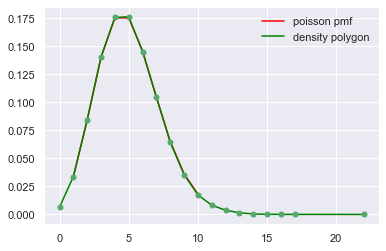

In [27]:
#n = 100000
#density polygon
pol_100000 = np.unique(sample_100000[1], return_counts=True)
x_100000 = pol_100000[0]
y_100000 = pol_100000[1]
plt.plot(pmf_100000,
         poisson.pmf(pmf_100000, p_lambda),
         ms=8,
         label='poisson pmf',
         color='red')
plt.gca().plot(x_100000,
               y_100000 / len(sample_100000[1]),
               label='density polygon',
               color='green')
plt.gca().plot(x_100000, y_100000 / len(sample_100000[1]), 'go', ms=5)
plt.legend(frameon=False)

__Laplace distribution with__ ${\bf{\lambda =1,\mu = 5}}$

In [28]:
lpl_mu = 5
lpl_lam = 1
sample_5,sample_10,sample_100,sample_1000,sample_100000 = [],[],[],[],[]

for i in range(5):
    sample_5.append(laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=5))
    sample_10.append(laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=10))
    sample_100.append(
        laplace.rvs( scale=lpl_lam, loc=lpl_mu, size=100))
    sample_1000.append(
        laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=1000))
    sample_100000.append(
        laplace.rvs(scale=lpl_lam, loc=lpl_mu, size=100000))

In [29]:
print(np.round(sample_5,3))

[[4.908 5.664 5.114 3.426 4.277]
 [6.848 5.158 6.124 5.237 4.983]
 [4.913 8.716 3.445 5.075 2.743]
 [5.644 5.652 6.008 6.971 4.622]
 [4.876 3.105 6.012 3.338 5.35 ]]


In [30]:
print(np.round(sample_10,3))

[[4.299 6.319 3.417 4.78  5.058 6.462 4.899 3.98  5.001 5.202]
 [3.127 4.107 4.79  4.789 5.099 5.679 6.873 5.455 5.547 5.739]
 [3.867 4.251 7.577 5.552 4.775 6.128 4.105 3.391 6.236 6.379]
 [8.437 3.265 5.443 4.76  3.955 4.605 4.826 4.582 4.669 4.858]
 [4.129 4.193 3.67  7.001 5.087 4.141 3.563 4.416 7.649 5.845]]


__Empirical function and distributin function for different__ ${\bf{n}}$

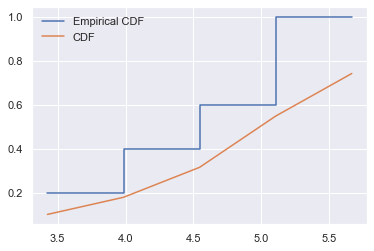

In [31]:
#Empirical CDF for n = 5
ecdf_5 = ECDF(sample_5[0])
x = np.linspace(min(sample_5[0]), max(sample_5[0]), num=len(sample_5[0]))
y_ecdf = ecdf_5(x)
plt.gca().step(x, y_ecdf, label='Empirical CDF')
#CDF for n = 5
y_cdf_5 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_5, label='CDF')
plt.legend(frameon = False)

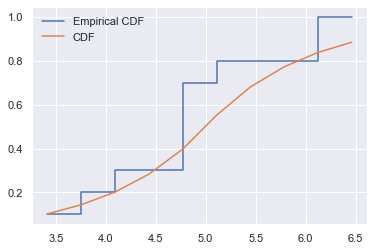

In [32]:
#Empirical CDF for n = 10
ecdf_10 = ECDF(sample_10[0])
x = np.linspace(min(sample_10[0]), max(sample_10[0]), num=len(sample_10[0]))
y = ecdf_10(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 10
y_cdf_10 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_10, label='CDF')
plt.legend(frameon=False)

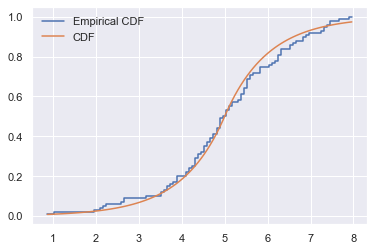

In [33]:
#Empirical CDF for n = 100
ecdf_100 = ECDF(sample_100[0])
x = np.linspace(min(sample_100[0]), max(sample_100[0]), num=len(sample_100[0]))
y = ecdf_100(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 100
y_cdf_100 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_100, label='CDF')
plt.legend(frameon=False)

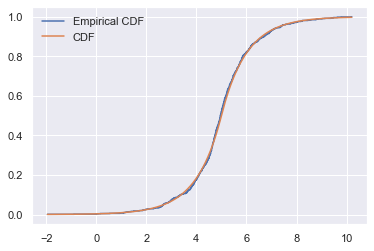

In [34]:
#Empirical CDF for n = 1000
ecdf_1000 = ECDF(sample_1000[0])
x = np.linspace(min(sample_1000[0]),
                max(sample_1000[0]),
                num=len(sample_1000[0]))
y = ecdf_1000(x)
plt.step(x, y, label='Empirical CDF')

#CDF for n = 1000
y_cdf_1000 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_1000, label='CDF')
plt.legend(frameon=False)


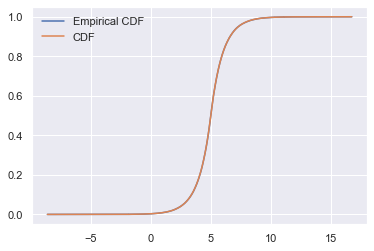

In [35]:
#Empirical CDF for n = 100000
ecdf_100000 = ECDF(sample_100000[0])
x = np.linspace(min(sample_100000[0]),
                max(sample_100000[0]),
                num=len(sample_100000[0]))
y_ecdf100000 = ecdf_100000(x)
plt.step(x, y_ecdf100000, label='Empirical CDF')

#CDF for n = 100000
y_cdf_100000 = laplace.cdf(x, 5)
plt.gca().plot(x, y_cdf_100000, label='CDF')
plt.legend(frameon=False)

__Finding the upper limit of the difference of each pair for different samples__

In [56]:
sam = [sample_5[0], sample_10[0], sample_100[0], sample_1000[0], sample_100000[0]]
ecdfs = []
for i in range(5):
    e = ECDF(sam[i])
    ecdfs.append(e(sam[i]))
list1 = [5, 10, 100, 1000, 100000]
list2 = [5, 10, 100, 1000, 100000]
k1 = -1
f = 1
for i in list1:
    k1 += 1
    k2 = -1
    for j in list2:
        f += 1
        k2 += 1
        m = 0.0
        length = min(i, j)
        s1 = ecdfs[k1]
        s2 = ecdfs[k2]
        for h in range(length):
            if m < abs(s1[h] - s2[h]):
                m = abs(s1[h] - s2[h])
        print('Точная верхняя граница для n={} и n={}: {}'.format(i, j, np.around(m / f, 2)))
    f = f - 5 + k1

Точная верхняя граница для n=5 и n=5: 0.0
Точная верхняя граница для n=5 и n=10: 0.23
Точная верхняя граница для n=5 и n=100: 0.22
Точная верхняя граница для n=5 и n=1000: 0.08
Точная верхняя граница для n=5 и n=100000: 0.07
Точная верхняя граница для n=10 и n=5: 0.35
Точная верхняя граница для n=10 и n=10: 0.0
Точная верхняя граница для n=10 и n=100: 0.21
Точная верхняя граница для n=10 и n=1000: 0.16
Точная верхняя граница для n=10 и n=100000: 0.16
Точная верхняя граница для n=100 и n=5: 0.3
Точная верхняя граница для n=100 и n=10: 0.21
Точная верхняя граница для n=100 и n=100: 0.0
Точная верхняя граница для n=100 и n=1000: 0.16
Точная верхняя граница для n=100 и n=100000: 0.12
Точная верхняя граница для n=1000 и n=5: 0.08
Точная верхняя граница для n=1000 и n=10: 0.13
Точная верхняя граница для n=1000 и n=100: 0.14
Точная верхняя граница для n=1000 и n=1000: 0.0
Точная верхняя граница для n=1000 и n=100000: 0.11
Точная верхняя граница для n=100000 и n=5: 0.05
Точная верхняя граница 

__Creating variation series__

In [36]:
def sorted_sample(x):
    s = []
    for i in (x):
        s.append(sorted(i))
    return s


sorted_5 = sorted_sample(sample_5)
sorted_10 = sorted_sample(sample_10)
sorted_100 = sorted_sample(sample_100)
sorted_1000 = sorted_sample(sample_1000)
sorted_100000 = sorted_sample(sample_100000)

In [37]:
for i in sorted_5:
    print(np.round(i, 3))

[3.426 4.277 4.908 5.114 5.664]
[4.983 5.158 5.237 6.124 6.848]
[2.743 3.445 4.913 5.075 8.716]
[4.622 5.644 5.652 6.008 6.971]
[3.105 3.338 4.876 5.35  6.012]


In [38]:
for i in sorted_10:
    print(np.round(i, 3))

[3.417 3.98  4.299 4.78  4.899 5.001 5.058 5.202 6.319 6.462]
[3.127 4.107 4.789 4.79  5.099 5.455 5.547 5.679 5.739 6.873]
[3.391 3.867 4.105 4.251 4.775 5.552 6.128 6.236 6.379 7.577]
[3.265 3.955 4.582 4.605 4.669 4.76  4.826 4.858 5.443 8.437]
[3.563 3.67  4.129 4.141 4.193 4.416 5.087 5.845 7.001 7.649]


__Lets count quantiles__

In [39]:
level = [0.1, 0.5, 0.7]
def statss(x):
    lsts = []
    for i in level:
        lsts.append(x[0][round(len(x[0]) * i + 1)])
    print('Квантили уровней 0.1,0,5.0,7 для n ={}'.format(len(x[0])))
    print(np.round(lsts,3))


statss(sorted_5)
statss(sorted_10)
statss(sorted_100)
statss(sorted_1000)
statss(sorted_100000)


Квантили уровней 0.1,0,5.0,7 для n =5
[4.908 5.664 5.664]
Квантили уровней 0.1,0,5.0,7 для n =10
[4.299 5.058 6.319]
Квантили уровней 0.1,0,5.0,7 для n =100
[3.571 5.065 5.714]
Квантили уровней 0.1,0,5.0,7 для n =1000
[3.393 4.967 5.477]
Квантили уровней 0.1,0,5.0,7 для n =100000
[3.396 5.002 5.516]


__Theoritical quantiles__


In [40]:
level = [0.1, 0.5, 0.7]
def theo_qu(x):
    quant =[]
    for i in level:
        k = round(i*(len(x[0])-1))
        if k == len(x) - 1:
            t = x[0][k]
        else:
            t = x[0][k+1]
        if k+1<i*len(x[0]):
            quant.append(x[0][t])
        elif k+1 == i*len(x[0]):
            quant.append((x[0][k]+t)/2 )
        elif k+1> i*len(x[0]):
            quant.append(x[0][k])
    print('Квантили уровней 0.1,0,5.0,7 для n ={}'.format(len(x[0])))
    print(np.round(quant,3))

In [41]:
theo_qu(sorted_5)
theo_qu(sorted_10)
theo_qu(sorted_100)
theo_qu(sorted_1000)
theo_qu(sorted_100000)

Квантили уровней 0.1,0,5.0,7 для n =5
[3.426 4.908 5.114]
Квантили уровней 0.1,0,5.0,7 для n =10
[3.98  4.899 5.13 ]
Квантили уровней 0.1,0,5.0,7 для n =100
[3.56  5.033 5.628]
Квантили уровней 0.1,0,5.0,7 для n =1000
[3.387 4.966 5.474]
Квантили уровней 0.1,0,5.0,7 для n =100000
[3.396 5.002 5.516]


__Vizualization of histogram and density polygon__


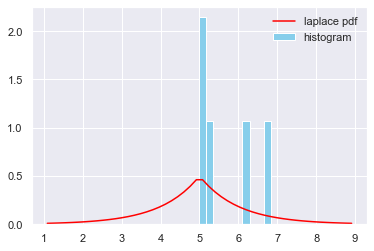

In [42]:
#n = 5
#histogram
pdf_5 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_5[1],density = True, label='histogram', color="skyblue")
plt.legend(frameon=False)

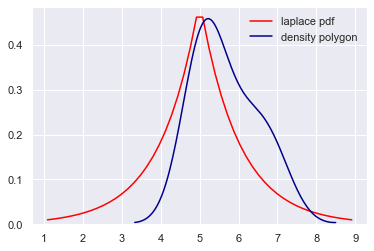

In [43]:
#n = 5
#density polygon
pol_5 = np.unique(sample_5[1], return_counts=True)
x_5 = pol_5[0]
y_5 = pol_5[1]
plt.gca().plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')

sns.kdeplot(sample_5[1], color='darkblue', label='density polygon', shade=False)
plt.legend(frameon=False)

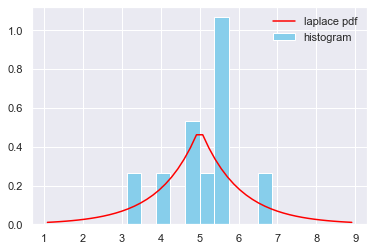

In [44]:
#n = 10
#histogram
pdf_10 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_10,
               laplace.pdf(pdf_10, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_10[1], density=1, label='histogram', color="skyblue")
plt.legend(frameon = False)

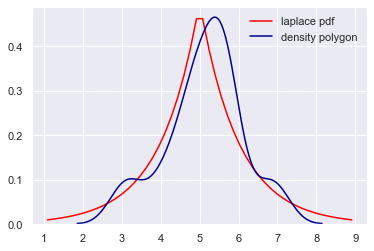

In [45]:
#n = 10
#density polygon
pol_10 = np.unique(sample_10[1], return_counts=True)
x_10 = pol_10[0]
y_10 = pol_10[1]
plt.plot(pdf_5, laplace.pdf(pdf_5, 5), ms=5, label='laplace pdf', color='red')

sns.kdeplot(sample_10[1],
            color='darkblue',
            label='density polygon',
            shade=False)

plt.legend(frameon=False)

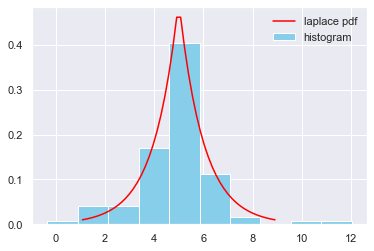

In [46]:
#n = 100
#histogram
pdf_100 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_100,
               laplace.pdf(pdf_100, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_100[1], density=True, label='histogram', color="skyblue")
plt.legend(frameon = False)

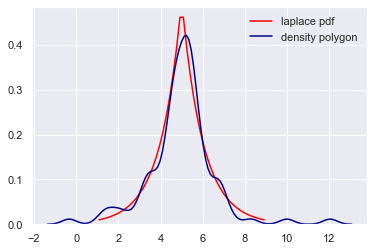

In [47]:
#n = 100
#density polygon
pol_100 = np.unique(sample_100[1], return_counts=True)
x_100 = pol_100[0]
y_100 = pol_100[1]
plt.plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')

sns.kdeplot(sample_100[1],
            color='darkblue',
            label='density polygon',
            shade=False)
plt.legend(frameon = False)

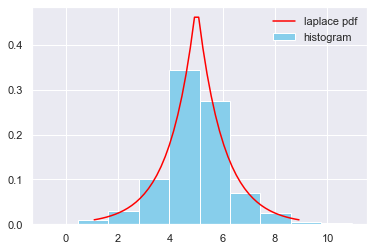

In [48]:
#n = 1000
pdf_1000 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_1000,
               laplace.pdf(pdf_1000, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_1000[1],
               density=True,
               label='histogram',
               color="skyblue")

plt.legend(frameon = False)

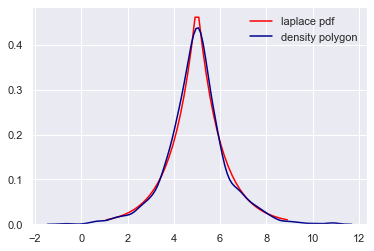

In [49]:
#n = 1000
#density polygon
pol_1000 = np.unique(sample_1000[1], return_counts=True)
x_1000 = pol_1000[0]
y_1000 = pol_1000[1]
plt.plot(pdf_5,
               laplace.pdf(pdf_5, 5),
               ms=5,
               label='laplace pdf',
               color='red')
sns.kdeplot(sample_1000[1],
            color='darkblue',
            label='density polygon',
            shade=False)
plt.legend(frameon = False)

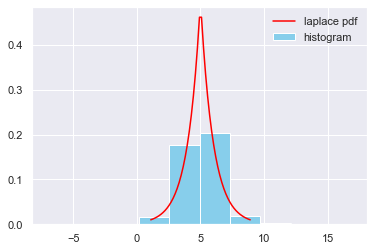

In [50]:
#n = 100000
pdf_100000 = np.linspace(laplace.ppf(0.01, 5), laplace.ppf(0.99, 5))
plt.gca().plot(pdf_100000,
               laplace.pdf(pdf_100000, 5),
               ms=5,
               label='laplace pdf',
               color='red')
plt.gca().hist(sample_100000[1],
               density=True,
               label='histogram',
               color="skyblue")
plt.legend(frameon=False)

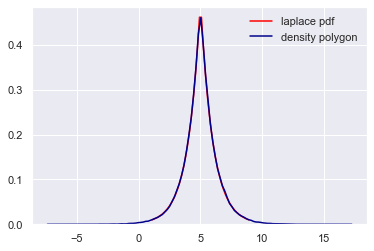

In [51]:
#n = 100000
#density polygon
pol_100000 = np.unique(sample_100000[1], return_counts=True)
x_100000 = pol_100000[0]
y_100000 = pol_100000[1]
plt.plot(pdf_100000,
               laplace.pdf(pdf_100000, 5),
               ms=5,
               label='laplace pdf',
               color='red')
sns.kdeplot(sample_100000[1],
            color='darkblue',
            label='density polygon',
            shade=False,)
plt.legend(frameon = False)

In [36]:
def sorted_sample(x):
    s = []
    for i in (x):
        s.append(sorted(i))
    return s

ops = []

sorted_5 = sorted_sample(sample_5)
sorted_10 = sorted_sample(sample_10)
sorted_100 = sorted_sample(sample_100)
sorted_1000 = sorted_sample(sample_1000)
sorted_100000 = sorted_sample(sample_100000)